In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None) # 显示所有列
pd.set_option('display.max_rows', None) # 显示所有行

In [4]:
train_org = pd.read_csv("train.csv")
test_org = pd.read_csv("test.csv")
train_org.head()

,CUST_ID,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_EUP_ACCT_FLAG,CUST_AU_ACCT_FLAG,CUST_SALARY_FINANCIAL_FLAG,CUST_SOCIAL_SECURITYIC_FLAG,CUST_MTFLOW_FLAG,CUST_DOLLER_FLAG,CUST_INTERNATIONAL_GOLD_FLAG,CUST_INTERNATIONAL_COMMON_FLAG,CUST_INTERNATIONAL_SIL_FLAG,CUST_INTERNATIONAL_DIAMOND_FLAG,CUST_GOLD_COMMON_FLAG,CUST_STAD_PLATINUM_FLAG,CUST_LUXURY_PLATINUM_FLAG,CUST_PLATINUM_FINANCIAL_FLAG,CUST_DIAMOND_FLAG,CUST_INFINIT_FLAG,CUST_BUSINESS_FLAG,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_FLAG,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,CRED_FLAG,RELATED_REPAY_FLAG,TOT_REPAY_FLAG,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHAN

In [5]:
train_data = train_org.copy()
test_data = test_org.copy()

## 数据信息

In [6]:
print(train_data.shape)
print(test_data.shape)

(269798, 627)
(189766, 626)


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269798 entries, 0 to 269797
Columns: 627 entries, CUST_ID to L6_CHANNEL_TXN_DOUTTA_AVGCNT
dtypes: float64(557), int64(38), object(32)
memory usage: 1.3+ GB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189766 entries, 0 to 189765
Columns: 626 entries, CUST_ID to L6_CHANNEL_TXN_DOUTTA_AVGCNT
dtypes: float64(393), int64(201), object(32)
memory usage: 906.3+ MB


### 类标签极不平衡

In [9]:
bad_good_count=train_data['bad_good'].value_counts()

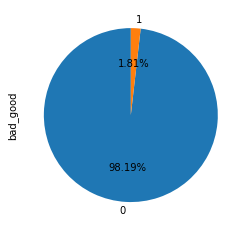

In [10]:
bad_good_count.plot.pie(labeldistance = 1.1,autopct = '%1.2f%%',
                        shadow = False,startangle = 90,pctdistance = 0.6)

## 特征工程

In [11]:
drop_columns = []

#### 1. 去除明显无关字段

- CUST_ID：客户号

In [12]:
drop_columns.append('CUST_ID')

- IDF_TYP_CD：证件类型

In [13]:
train_org.groupby('IDF_TYP_CD')['IDF_TYP_CD'].count()

IDF_TYP_CD
ZR01    264956
ZR02        35
ZR03      1675
ZR04       279
ZR05        78
ZR06        76
ZR07       175
ZR08       218
ZR09       209
ZR10        17
ZR11       221
ZR12         1
ZR13         6
ZR14         1
ZR16         5
ZR20       586
ZR21       552
ZR22       708
Name: IDF_TYP_CD, dtype: int64

In [14]:
drop_columns.append('IDF_TYP_CD')

#### 2. 去除只有一个属性的特征

In [15]:
orig_columns = test_data.columns
for col in orig_columns:
    col_series = train_data[col].dropna().unique()
    if len(col_series)==1:
        drop_columns.append(col)

In [16]:
print(drop_columns)

['CUST_ID', 'IDF_TYP_CD', 'CUST_SOCIAL_SECURITYIC_FLAG', 'CUST_MTFLOW_FLAG', 'CUST_TENURE_MONTHS', 'DEP_SA_FGCR_BAL', 'DEP_SA_FIXTCUR_AMT', 'DEP_SA_FGCR_FIXTCUR_AMT', 'DEP_SA_DEPCD_COSM_AMT', 'DEP_SA_DEPCD_COSM_CNT', 'L3DEP_SA_DEPCD_COSM_AVG_AMT', 'L3DEP_SA_DEPCD_COSM_AVG_CNT', 'L6DEP_SA_DEPCD_COSM_AVG_AMT', 'L6DEP_SA_DEPCD_COSM_AVG_CNT', 'BK_BOND_FLAG', 'L3_DEP_CARD_CASH_AMT', 'L3_DEP_CARD_CASH_CNT', 'L6_DEP_CARD_CASH_AMT', 'L6_DEP_CARD_CASH_CNT', 'DEP_CARD_CASH_CNT', 'DEP_CARD_CASH_AMT', 'CHANNEL_CTR_GLOAN_AMT', 'CHANNEL_CTR_GLOAN_CNT', 'L3_CHANNEL_CTR_GLOAN_MONTHAVG_AM', 'L3_CHANNEL_CTR_GLOAN_MONTHAVG_CN', 'L6_CHANNEL_CTR_GLOAN_MONTHAVG_AM', 'L6_CHANNEL_CTR_GLOAN_MONTHAVG_CN', 'CHANNEL_WEBBANK_INSURE_AMT', 'CHANNEL_WEBBANK_INSURE_CNT', 'CHANNEL_WEBBANK_GLOAN_AMT', 'CHANNEL_WEBBANK_GLOAN_CNT', 'L3_CHANNEL_WEBBANK_INSURE_MONTHA', 'L3_CHANNEL_WEBBANK_INSURE_MONTH0', 'L3_CHANNEL_WEBBANK_GLOAN_MONTHAV', 'L3_CHANNEL_WEBBANK_GLOAN_MONTHA0', 'L6_CHANNEL_WEBBANK_INSURE_MONTHA', 'L6_CHANNEL_W

In [17]:
train_data=train_data.drop(drop_columns,axis=1)
test_data=test_data.drop(drop_columns,axis=1)

In [18]:
print(train_data.shape)
print(test_data.shape)

(269798, 533)
(189766, 532)


#### 3. 缺失值

In [19]:
null_counts = train_data.isnull().sum()
print(null_counts[null_counts>0])

DEP_SA_TRSP_WITD_AMT                1
DEP_SA_FGCR_TRSP_DEP_AMT            1
DEP_SA_FGCR_TRSP_WITD_AMT           1
DEP_SA_DAY_MAX_IN_AMT               1
DEP_SA_MOTH_MAX_IN_AMT              1
DEP_SA_DAY_MAX_OUT_AMT              1
DEP_SA_MOTH_MAX_OUT_AMT             1
DEP_SA_FGCR_DAY_MAX_IN_AMT          1
DEP_SA_FGCR_MOTH_MAX_IN_AMT         1
DEP_SA_FGCR_DAY_MAX_OUT_AMT         1
DEP_SA_FGCR_MOTH_MAX_OUT_AMT        1
L3DEP_SA_DAY_MAX_IN_AMT             1
L3DEP_SA_MOTH_MAX_IN_AMT            1
L3DEP_SA_DAY_MAX_OUT_AMT            1
L3DEP_SA_MOTH_MAX_OUT_AMT           1
L6DEP_SA_DAY_MAX_IN_AMT             1
L6DEP_SA_MOTH_MAX_IN_AMT            1
L6DEP_SA_DAY_MAX_OUT_AMT            1
L6DEP_SA_MOTH_MAX_OUT_AMT           1
L3DEP_SA_FGCR_DAY_MAX_IN_AMT        1
L3DEP_SA_FGCR_MOTH_MAX_IN_AMT       1
L3DEP_SA_FGCR_DAY_MAX_OUT_AMT       1
L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT      1
L6DEP_SA_FGCR_DAY_MAX_IN_AMT        1
L6DEP_SA_FGCR_MOTH_MAX_IN_AMT       1
L6DEP_SA_FGCR_DAY_MAX_OUT_AMT       1
L6DEP_SA_FGC

In [ ]:
# train_data = train_data.dropna(axis=0)
# test_data = test_data.dropna(axis=0)

In [20]:
train_data.fillna(method='ffill',axis=0,inplace=True) 
test_data.fillna(method='ffill',axis=0,inplace=True) 

In [21]:
fillnull_counts = train_data.isnull().sum()
print(fillnull_counts[fillnull_counts>0])

Series([], dtype: int64)


#### 4. 数据类型转换
sklearn库不接受字符型的数据，需要将特征中的字符型的数据进行处理。

In [22]:
object_columns_df = train_data.select_dtypes(include=['object'])
object_columns = object_columns_df.columns
for col in object_columns:
    print('-'*12,col,'-'*12)
    print(train_data[col].value_counts())

------------ GENDER ------------
1    103749
2     95393
1     35905
2     33658
X      1093
Name: GENDER, dtype: int64
------------ CUST_EUP_ACCT_FLAG ------------
N    269068
Y       730
Name: CUST_EUP_ACCT_FLAG, dtype: int64
------------ CUST_AU_ACCT_FLAG ------------
N    269390
Y       408
Name: CUST_AU_ACCT_FLAG, dtype: int64
------------ CUST_SALARY_FINANCIAL_FLAG ------------
N    227919
Y     41879
Name: CUST_SALARY_FINANCIAL_FLAG, dtype: int64
------------ CUST_DOLLER_FLAG ------------
N    233118
Y     36680
Name: CUST_DOLLER_FLAG, dtype: int64
------------ CUST_INTERNATIONAL_GOLD_FLAG ------------
N    260125
Y      9673
Name: CUST_INTERNATIONAL_GOLD_FLAG, dtype: int64
------------ CUST_INTERNATIONAL_COMMON_FLAG ------------
N    267665
Y      2133
Name: CUST_INTERNATIONAL_COMMON_FLAG, dtype: int64
------------ CUST_INTERNATIONAL_SIL_FLAG ------------
N    255079
Y     14719
Name: CUST_INTERNATIONAL_SIL_FLAG, dtype: int64
------------ CUST_INTERNATIONAL_DIAMOND_FLAG -------

#### GENDER：性别

In [23]:
gender_replace = {'GENDER':{'X':0}}
train_data = train_data.replace(gender_replace)
test_data = test_data.replace(gender_replace)

In [24]:
train_data['GENDER'] = train_data['GENDER'].astype('int')
test_data['GENDER'] = test_data['GENDER'].astype('int')

#### 其他

In [25]:
for col in object_columns[1:]:
    flag_replace={col:{'Y':1,'N':0}}
    train_data = train_data.replace(flag_replace)
    test_data = test_data.replace(flag_replace)
    train_data[col] = train_data[col].astype('int')
    test_data[col] = test_data[col].astype('int')

In [26]:
for col in object_columns:
    print('-'*12,col,'-'*12)
    print(train_data[col].value_counts())

------------ GENDER ------------
1    139654
2    129051
0      1093
Name: GENDER, dtype: int64
------------ CUST_EUP_ACCT_FLAG ------------
0    269068
1       730
Name: CUST_EUP_ACCT_FLAG, dtype: int64
------------ CUST_AU_ACCT_FLAG ------------
0    269390
1       408
Name: CUST_AU_ACCT_FLAG, dtype: int64
------------ CUST_SALARY_FINANCIAL_FLAG ------------
0    227919
1     41879
Name: CUST_SALARY_FINANCIAL_FLAG, dtype: int64
------------ CUST_DOLLER_FLAG ------------
0    233118
1     36680
Name: CUST_DOLLER_FLAG, dtype: int64
------------ CUST_INTERNATIONAL_GOLD_FLAG ------------
0    260125
1      9673
Name: CUST_INTERNATIONAL_GOLD_FLAG, dtype: int64
------------ CUST_INTERNATIONAL_COMMON_FLAG ------------
0    267665
1      2133
Name: CUST_INTERNATIONAL_COMMON_FLAG, dtype: int64
------------ CUST_INTERNATIONAL_SIL_FLAG ------------
0    255079
1     14719
Name: CUST_INTERNATIONAL_SIL_FLAG, dtype: int64
------------ CUST_INTERNATIONAL_DIAMOND_FLAG ------------
0    254110
1     

In [27]:
print(train_data.shape)
print(test_data.shape)

(269798, 533)
(189766, 532)


In [28]:
X_pre = test_data
X = train_data.drop(['bad_good'],axis=1)
Y = train_data['bad_good']

## 模型

In [29]:
from sklearn.preprocessing import MinMaxScaler # 不使用StandardScaler：有很多特征是01变量
from imblearn.over_sampling import SMOTE # pip install -U imbalanced-learn
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score

### 调参测试

In [30]:
scaler = MinMaxScaler()
X_sca = scaler.fit_transform(X)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X_sca,Y,test_size=0.2,random_state=0)

In [32]:
# SMOTE过采样
oversampler=SMOTE(random_state=0) 
os_x_train,os_y_train=oversampler.fit_sample(x_train,y_train) 

In [33]:
pca_lr = Pipeline([ ('pca', PCA(n_components='mle')),
                    ('lr', LogisticRegression(random_state=1))
                    ])

In [34]:
parameters = {'lr__C':[0.001,0.01,0.1]} # C:smaller values specify stronger regularization.
clf = GridSearchCV(pca_lr, parameters,cv=3, scoring="f1_macro")
clf.fit(os_x_train,os_y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(n_components='mle')),
                                       ('lr',
                                        LogisticRegression(random_state=1))]),
             param_grid={'lr__C': [0.001, 0.01, 0.1]}, scoring='f1_macro')

In [35]:
print('best score:\n',clf.best_score_)
print('best parameters:\n',clf.best_params_)

best score:
 0.9835601433267867
best parameters:
 {'lr__C': 0.1}


In [36]:
best_model=clf.best_estimator_
y_predict=best_model.predict(x_test)
f1_macro = f1_score(y_test, y_predict,average='macro')
print(f1_macro)

0.7669918510491587


### 训练模型

In [37]:
# SMOTE过采样
oversampler=SMOTE(random_state=0)
os_X,os_Y=oversampler.fit_sample(X,Y)

In [39]:
model = Pipeline([('scale', MinMaxScaler()),
                    ('pca', PCA(n_components='mle')),
                    ('lr', LogisticRegression(C=0.001,random_state=1))
                    ])

In [40]:
model.fit(os_X,os_Y)

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components='mle')),
                ('lr', LogisticRegression(C=0.001, random_state=1))])

## 预测

In [30]:
Y_pre = model.predict(X_pre)
result_df = pd.DataFrame({'CUST_ID':test_org['CUST_ID'],'bad_good':Y_pre})

In [31]:
result_df.to_csv('answer0001.csv',index=None)

In [27]:
result_df.head()

,CUST_ID,bad_good
0,1000000239,0
1,1000003260,1
2,1000003414,0
3,1000004746,0
4,1000005243,0


In [52]:
result_df.shape

(189766, 2)